In [1]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *

%matplotlib notebook

In [2]:
path_all = '/Users/blandt/Desktop/Rundowns/N2/'
path_wt = '/Users/blandt/Desktop/Rundowns/N2/211117_n2_wt_tom4,15,60'
path_ctrl = '/Users/blandt/Desktop/Rundowns/N2/211117_n2_11161900ctrl_tom4,15,60'
path_par2 = '/Users/blandt/Desktop/Rundowns/N2/211117_n2_11161900par2_tom4,15,60'

<IPython.core.display.Javascript object>


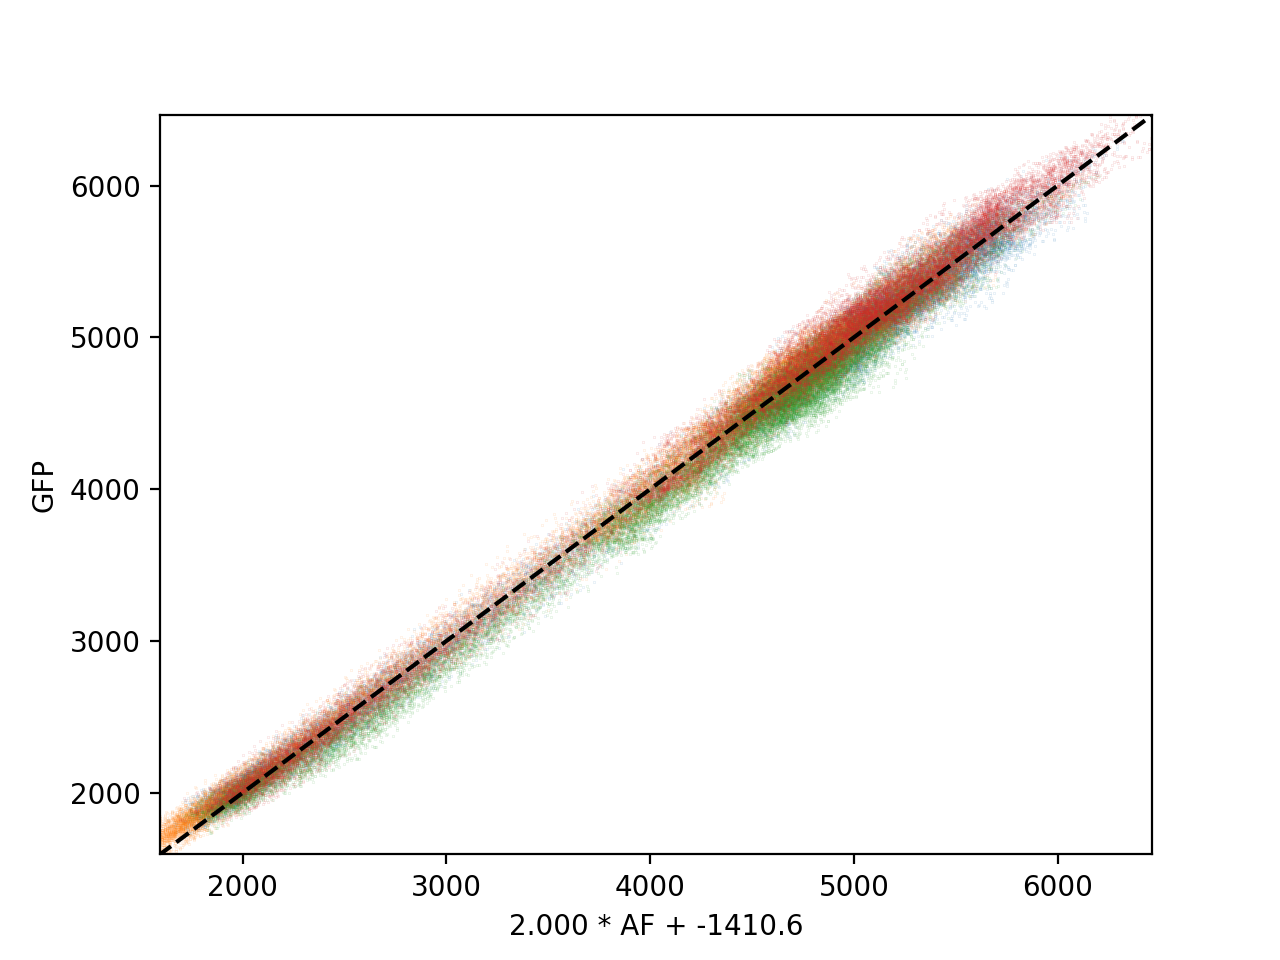

[1.99978782677183, -1410.6371600029279]


In [3]:
af_wt = AfCorrelation(direcslist(path_wt), sigma=2, expand=10, method='OLS')
af_wt.run()
af_wt.plot_prediction()
print(af_wt.params)

<IPython.core.display.Javascript object>


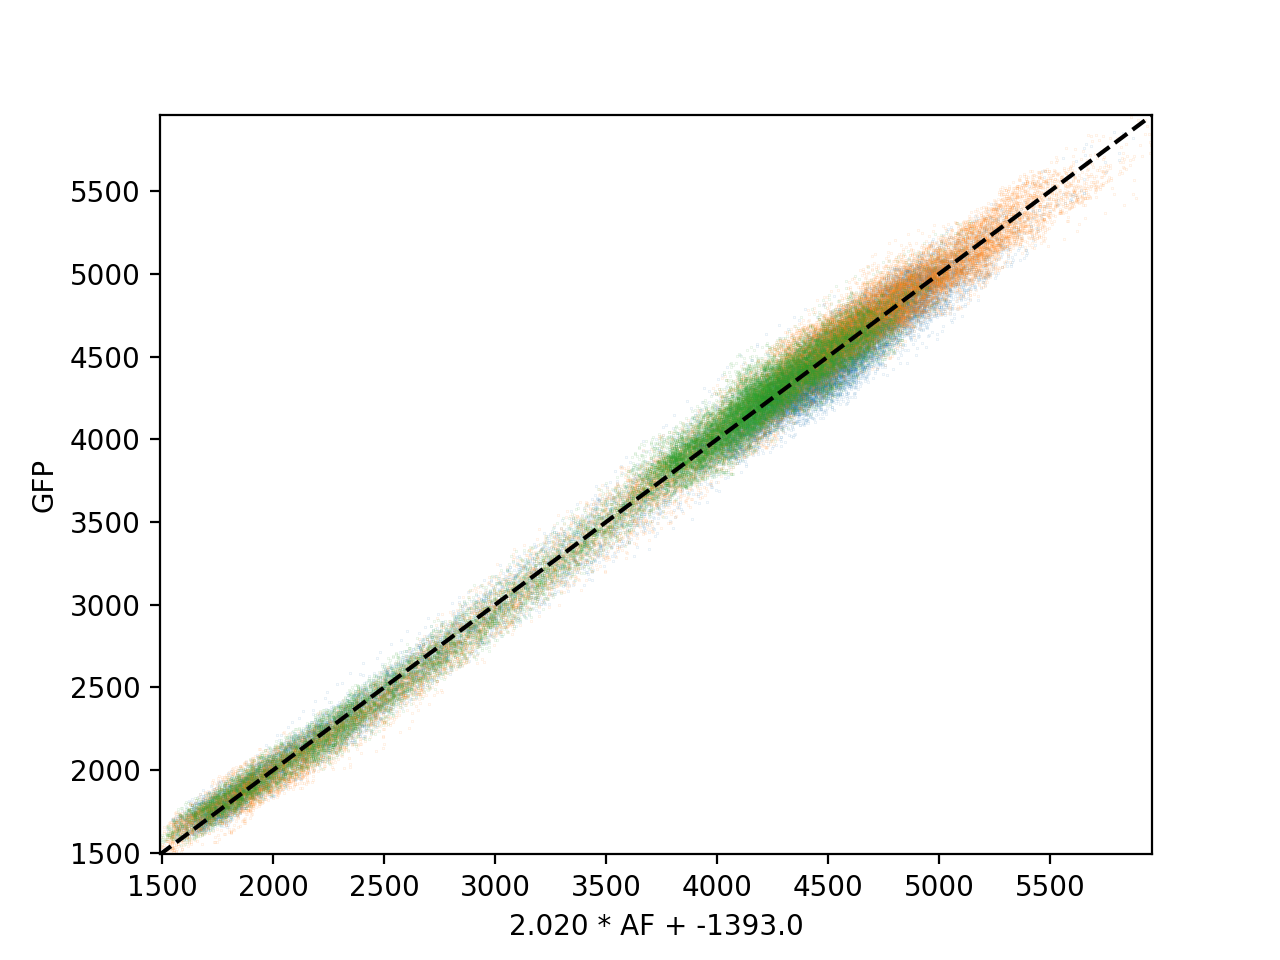

[2.019955529471873, -1392.9644773683626]


In [4]:
af_ctrl = AfCorrelation(direcslist(path_ctrl), sigma=2, expand=10, method='OLS')
af_ctrl.run()
af_ctrl.plot_prediction()
print(af_ctrl.params)

<IPython.core.display.Javascript object>


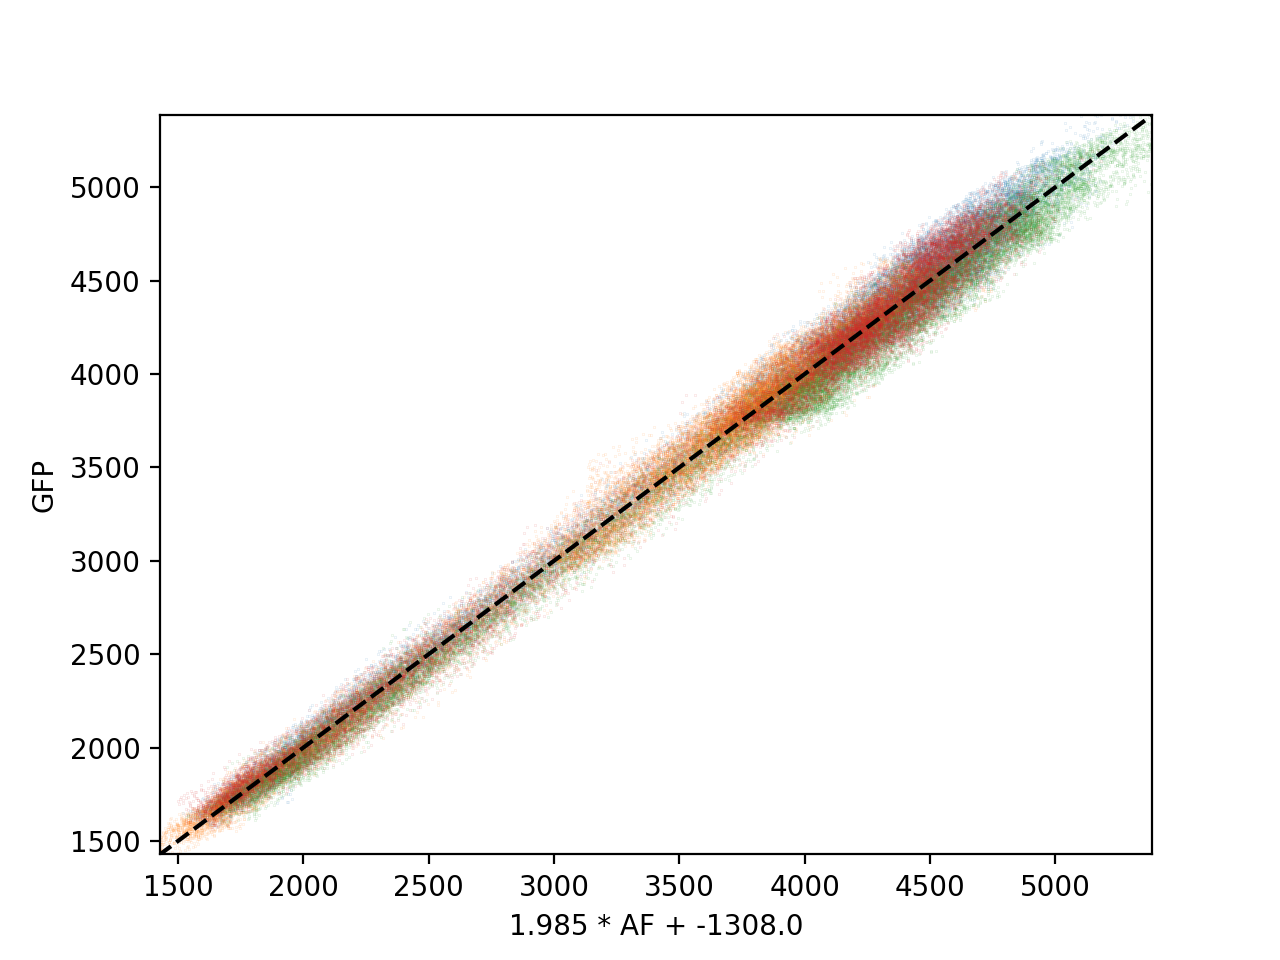

[1.9853760913380405, -1308.0360774996552]


In [5]:
af_par2 = AfCorrelation(direcslist(path_par2), sigma=2, expand=10, method='OLS')
af_par2.run()
af_par2.plot_prediction()
print(af_par2.params)

<IPython.core.display.Javascript object>


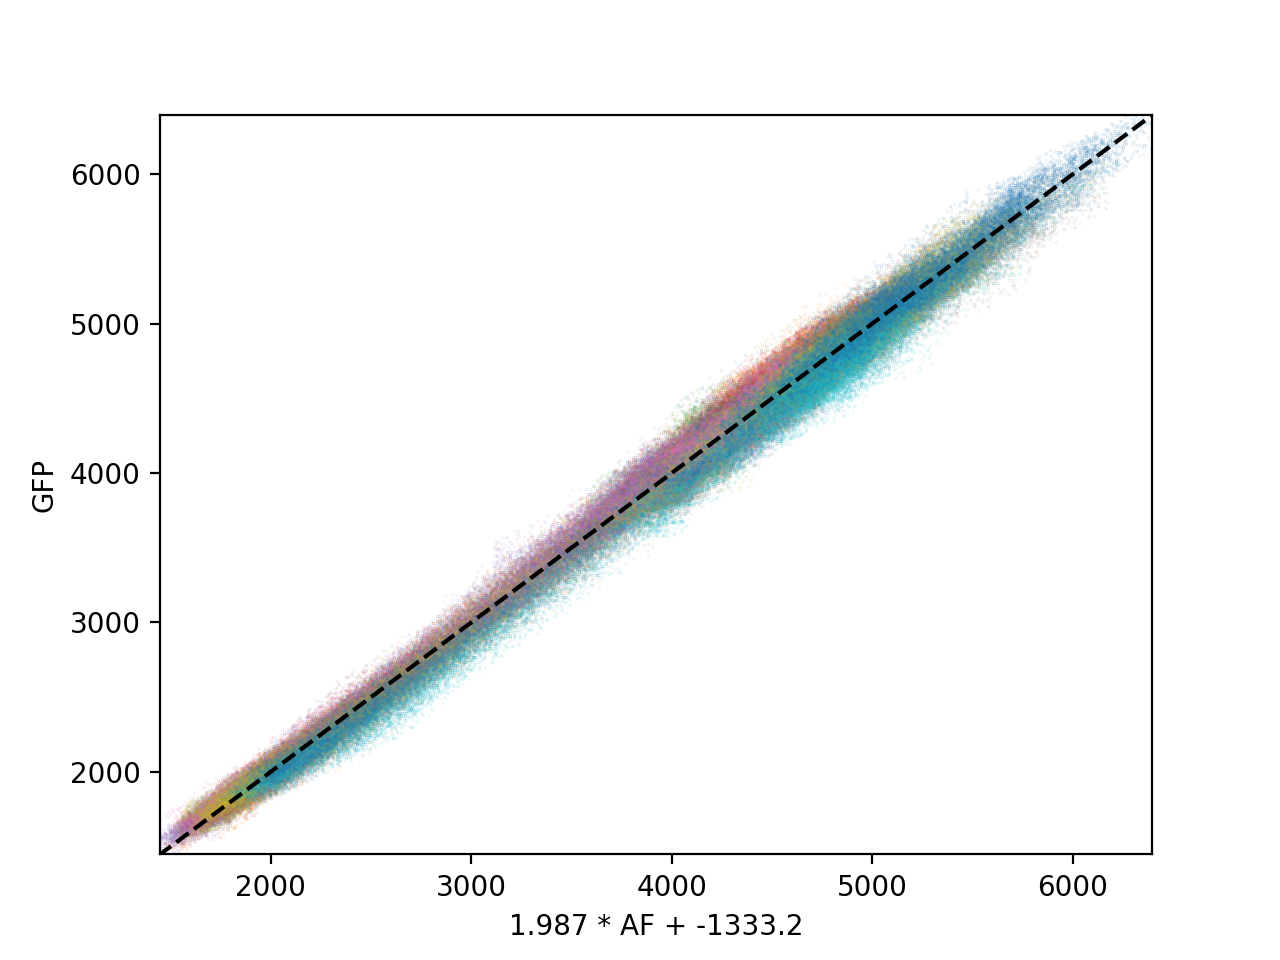

[1.9867122950661298, -1333.1735782862656]


In [6]:
af_par2 = AfCorrelation(direcslist(path_all, 1), sigma=2, expand=10, method='OLS')
af_par2.run()
af_par2.plot_prediction()
print(af_par2.params)

In [7]:
for p in direcslist(path_par2, 0):
    ch1 = load_image(glob.glob(p + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(p + '/*488 SP 630-75*')[0])
    ch3 = load_image(glob.glob(p + '/*561 SP 630-75*')[0])
    
    af_corrected = af_subtraction(ch1, ch2, *af_wt.params)
    save_img(af_corrected, p + '/af_corrected.tif')